数据类型    

首先来介绍 TensorFlow 中的基本数据类型，包含数值类型、字符串类型和布尔类型。

数值类型   

数值类型的张量是 TensorFlow 的主要数据载体，根据维度数来区分，可分为：
❑ 标量(Scalar)。单个的实数，如 1.2, 3.4 等，维度(Dimension)数为 0，shape 为[]。 ❑ 向量(Vector)。𝑛个实数的有序集合，通过中括号包裹，如[1.2]，[1.2,3.4]等，维度数 为 1，长度不定，shape 为[𝑛]。 ❑ 矩阵(Matrix)。𝑛行𝑚列实数的有序集合，如[[1,2],[3,4]]，也可以写成[1 2 3 4]维度数为 2，每个维度上的长度不定，shape 为[𝑛, 𝑚]。 ❑ 张量(Tensor)。所有维度数dim > 2的数组统称为张量。张量的每个维度也作轴(Axis)，一般维度代表了具体的物理含义，比如 Shape 为[2,32,32,3]的张量共有 4 维，如果表示图片数据的话，每个维度/轴代表的含义分别是图片数量、图片高度、图片宽度、图片通道数，其中 2 代表了 2 张图片，32 代表了高、宽均为 32，3 代表了 RGB 共 3 个通道。张量的维度数以及每个维度所代表的具体物理含义需要由用户自行定义。 在 TensorFlow 中间，为了表达方便，一般把标量、向量、矩阵也统称为张量，不作区分，需要根据张量的维度数或形状自行判断.

In [2]:
# 打印tf张量相关信息
import tensorflow as tf
x = tf.constant([1,2.,3.3])
a = tf.constant('Hello, Deep Learning.')
b = tf.constant(True)
x,a,b

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1. , 2. , 3.3], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'Hello, Deep Learning.'>,
 <tf.Tensor: shape=(), dtype=bool, numpy=True>)

其中 id 是 TensorFlow 中内部索引对象的编号，shape 表示张量的形状，dtype 表示张量的数 值精度，张量 numpy()方法可以返回 Numpy.array 类型的数据，方便导出数据到系统的其他模块。

数值精度

对于数值类型的张量，可以保存为不同字节长度的精度，如浮点数 3.14 既可以保存为16 位(Bit)长度，也可以保存为 32 位甚至 64 位的精度。位越长，精度越高，同时占用的内存空间也就越大。常用的精度类型有 tf.int16、tf.int32、tf.int64、tf.float16、tf.float32、tf.float64 等，其中 tf.float64 即为 tf.double

In [6]:
#在创建张量时，可以指定张量的保存精度，例如：
c = tf.constant(123456789, dtype=tf.int16) #0~2^16-1:0~65535
c,tf.constant(123456789, dtype=tf.int32)

(<tf.Tensor: shape=(), dtype=int16, numpy=-13035>,
 <tf.Tensor: shape=(), dtype=int32, numpy=123456789>)

可以看到，保存精度过低时，数据 123456789 发生了溢出，得到了错误的结果，一般使用  
tf.int32、tf.int64 精度。对于浮点数，高精度的张量可以表示更精准的数据，例如采用   
tf.float32 精度保存π时，实际保存的数据为 3.1415927。代码如下：

In [7]:
import numpy as np
np.pi # 从 numpy 中导入 pi 常量
d = tf.constant(np.pi, dtype=tf.float32) # 32 位
d,tf.constant(np.pi, dtype=tf.float64) # 64 位

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1415927>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.141592653589793>)

对于大部分深度学习算法，一般使用 tf.int32 和 tf.float32 可满足大部分场合的运算精度要求，部分对精度要求较高的算法，如强化学习某些算法，可以选择使用 tf.int64 和tf.float64 精度保存张量。

In [10]:
# 读取精度：通过访问张量的 dtype 成员属性可以判断张量的保存精度，例如：
print('before:',d.dtype) # 读取原有张量的数值精度
if d.dtype != tf.float64: # 如果精度不符合要求，则进行转换
    d = tf.cast(d,tf.float64) # tf.cast 函数可以完成精度转换
print('after :',d.dtype) # 打印转换后的精度

before: <dtype: 'float32'>
after : <dtype: 'float64'>


类型转换

系统的每个模块使用的数据类型、数值精度可能各不相同，对于不符合要求的张量的    
类型及精度，需要通过 tf.cast 函数进行转换，例如：

In [11]:
a = tf.constant(np.pi, dtype=tf.float16) # 创建 tf.float16 低精度张量
tf.cast(a, tf.double) # 翻倍转换为高精度张量

<tf.Tensor: shape=(), dtype=float64, numpy=3.140625>

In [13]:
#布尔类型与整型之间相互转换也是合法的，是比较常见的操作：
a = tf.constant([True, False])
tf.cast(a, tf.int32) # 布尔类型转整型
b = tf.constant([-1, 0, 1, 2])
tf.cast(b, tf.bool) # 整型转布尔类型
a,b

(<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>,
 <tf.Tensor: shape=(4,), dtype=int32, numpy=array([-1,  0,  1,  2])>)

待优化张量<br>
为了区分需要计算梯度信息的张量与不需要计算梯度信息的张量，TensorFlow 增加了<br>
一种专门的数据类型来支持梯度信息的记录：tf.Variable。tf.Variable 类型在普通的张量类<br>
型基础上添加了 name，trainable 等属性来支持计算图的构建。由于梯度运算会消耗大量的<br>
计算资源，而且会自动更新相关参数，对于不需要的优化的张量，如神经网络的输入𝑿，<br>
不需要通过 tf.Variable 封装；相反，对于需要计算梯度并优化的张量，如神经网络层的𝑾 和𝒃，需要通过 tf.Variable 包裹以便 TensorFlow 跟踪相关梯度信息。<br>
    通过 tf.Variable()函数可以将普通张量转换为待优化张量，例如：

In [14]:
a = tf.constant([-1, 0, 1, 2]) # 创建 TF 张量
aa = tf.Variable(a) # 转换为 Variable 类型
aa.name, aa.trainable # Variable 类型张量的属性

('Variable:0', True)

In [17]:
'''
其中张量的 name 和 trainable 属性是 Variable 特有的属性，name 属性用于命名计算图中的
变量，这套命名体系是 TensorFlow 内部维护的，一般不需要用户关注 name 属性；trainable
属性表征当前张量是否需要被优化，创建 Variable 对象时是默认启用优化标志，可以设置
trainable=False 来设置张量不需要优化。
除了通过普通张量方式创建 Variable，也可以直接创建，例如：
'''
a = tf.Variable([[1,2],[3,4]]) # 直接创建 Variable 张量
a

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

待优化张量可视为普通张量的特殊类型，普通张量其实也可以通过 GradientTape.watch()方    
法临时加入跟踪梯度信息的列表，从而支持自动求导功能。

创建张量

在 TensorFlow 中，可以通过多种方式创建张量，如从 Python 列表对象创建，从<br>
Numpy 数组创建，或者创建采样自某种已知分布的张量等。<br>

从数组、列表对象创建<br>

Numpy Array 数组和 Python List 列表是 Python 程序中间非常重要的数据载体容器，很 多数据都是通过 Python 语言将数据加载至 Array 或者 List 容器，再转换到 Tensor 类型，通<br>
过 TensorFlow 运算处理后导出到 Array 或者 List 容器，方便其他模块调用。<br>
通过 tf.convert_to_tensor 函数可以创建新 Tensor，并将保存在 Python List 对象或者<br>
Numpy Array 对象中的数据导入到新 Tensor 中，例如：

In [18]:
tf.convert_to_tensor([1,2.]) # 从列表创建张量

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [19]:
tf.convert_to_tensor(np.array([[1,2.],[3,4]])) # 从数组中创建张量

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1., 2.],
       [3., 4.]])>

需要注意的是，Numpy 浮点数数组默认使用 64 位精度保存数据，转换到 Tensor 类型时精   
度为 tf.float64，可以在需要的时候将其转换为 tf.float32 类型。   
实际上，tf.constant()和 tf.convert_to_tensor()都能够自动的把 Numpy 数组或者 Python   
列表数据类型转化为 Tensor 类型，这两个 API 命名来自 TensorFlow 1.x 的命名习惯，在    
TensorFlow 2 中函数的名字并不是很贴切，使用其一即可。

创建全 0 或全 1 张量

将张量创建为全 0 或者全 1 数据是非常常见的张量初始化手段。考虑线性变换<br>
𝒚 = 𝑾𝒙 + 𝒃，将权值矩阵𝑾初始化为全 1 矩阵，偏置 b 初始化为全 0 向量，此时线性变化<br>
层输出𝒚 = 𝒙，因此是一种比较好的层初始化状态。通过 tf.zeros()和 tf.ones()即可创建任意<br>
形状，且内容全 0 或全 1 的张量。例如，创建为 0 和为 1 的标量：

In [20]:
tf.zeros([]),tf.ones([]) # 创建全 0，全 1 的标量

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [21]:
tf.zeros([1]),tf.ones([1]) # 创建全 0，全 1 的向量

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)

In [22]:
#通过 tf.zeros_like, tf.ones_like 可以方便地新建与某个张量 shape 一致，且内容为全 0 或 全 1 的张量。例如创建与张量𝑨形状一样的全 0 张量：
a = tf.ones([2,3]) # 创建一个矩阵
tf.zeros_like(a) # 创建一个与 a 形状相同，但是全 0 的新矩阵

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [23]:
#创建与张量𝑨形状一样的全 1 张量：
a = tf.zeros([3,2]) # 创建一个矩阵
tf.ones_like(a) # 创建一个与 a 形状相同，但是全 1 的新矩阵

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

tf.*_like 是一系列的便捷函数，也可以通过 tf.zeros(a.shape)等方式实现。

创建自定义数值张量
除了初始化为全 0，或全 1 的张量之外，有时也需要全部初始化为某个自定义数值的<br>
张量，比如将张量的数值全部初始化为−1等。<br>
通过 tf.fill(shape, value)可以创建全为自定义数值 value 的张量，形状由 shape 参数指<br>
定。例如，创建元素为−1的标量：

In [25]:
tf.fill([], -1) # 创建-1 的标量

<tf.Tensor: shape=(), dtype=int32, numpy=-1>

In [26]:
tf.fill([2,2], 99) # 创建 2 行 2 列，元素全为 99 的矩阵

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[99, 99],
       [99, 99]])>

创建已知分布的张量<br>
正态分布(Normal Distribution，或 Gaussian Distribution)和均匀分布(Uniform <br>
Distribution)是最常见的分布之一，创建采样自这 2 种分布的张量非常有用，比如在卷积神<br>
经网络中，卷积核张量𝑾初始化为正态分布有利于网络的训练；在对抗生成网络中，隐藏<br>
变量𝒛一般采样自均匀分布。<br>
通过 tf.random.normal(shape, mean=0.0, stddev=1.0)可以创建形状为 shape，均值为<br>
mean，标准差为 stddev 的正态分布𝒩(mean, stddev2)。例如，创建均值为 0，标准差为 1<br>
的正态分布：

In [27]:
tf.random.normal([2,2]) # 创建标准正态分布的张量

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.9363311 , -0.28792652],
       [ 1.7928901 , -0.88683426]], dtype=float32)>

通过 tf.random.uniform(shape, minval=0, maxval=None, dtype=tf.float32)可以创建采样自    
[minval, maxval)区间的均匀分布的张量。例如创建采样自区间[0,1)，shape 为[2,2]的矩阵：

In [28]:
tf.random.uniform([2,2]) # 创建采样自[0,1)均匀分布的矩阵

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.18359685, 0.73593736],
       [0.7777262 , 0.54890764]], dtype=float32)>

In [29]:
tf.random.uniform([2,2],maxval=10) # 创建采样自[0,10)均匀分布的矩阵

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.86633444, 7.5765076 ],
       [1.3221478 , 9.289574  ]], dtype=float32)>

In [30]:
# 如果需要均匀采样整形类型的数据，必须指定采样区间的最大值 maxval 参数，同时指 定数据类型为 tf.int*型：
tf.random.uniform([2,2],maxval=100,dtype=tf.int32)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[19,  2],
       [35, 68]])>

创建序列   
在循环计算或者对张量进行索引时，经常需要创建一段连续的整型序列，可以通过    
tf.range()函数实现。tf.range(limit, delta=1)可以创建[0, limit)之间，步长为 delta 的整型序列，不包含 limit 本身。例如，创建 0~10，步长为 1 的整型序列：

In [31]:
 tf.range(10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [49]:
#创建 0~10，步长为 2 的整形序列：
tf.range(10,delta=2)
#创建 1~10，步长为 2 的整形序列：
tf.range(1,10,2)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 3, 5, 7, 9])>

张量的典型应用

在介绍完张量的相关属性和创建方式后，下面将介绍每种维度数下张量的典型应用，让在看到每种张量时，能够直观地联想到它主要的物理意义和用途，对后续张量的维度变换等一系列抽象操作的学习打下基础。本节在介绍典型应用时不可避免地会提及后续将要学习的网络模型或算法，学习时不需要完全理解，有初步印象即可。

标量

在 TensorFlow 中，标量最容易理解，它就是一个简单的数字，维度数为 0，shape 为 []。标量的一些典型用途是误差值的表示、各种测量指标的表示，比如准确度(Accuracy，简称 acc)，精度(Precision)和召回率(Recall)等。考虑某个模型的训练曲线，如图 4.1 所示，横坐标为训练步数 Step，纵坐标分别为Loss per Query Image 误差变化趋势(图 4.1(a))和准确度 Accuracy 变化趋势曲线(图 4.1(b))，其中损失值和准确度均由张量计算产生，类型为标量，可以直接可视化为曲线图。
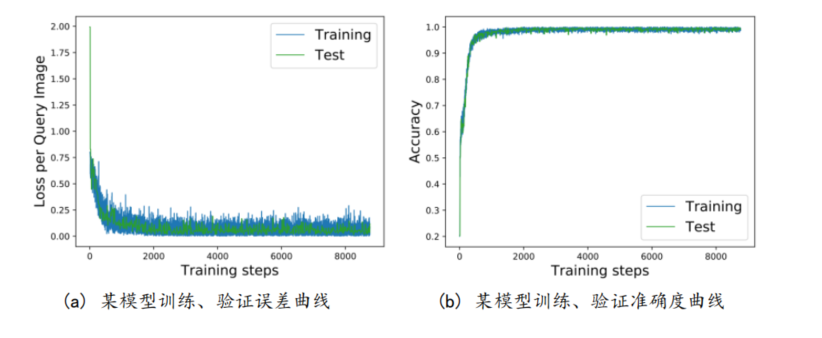

以均方差误差函数为例，经过 tf.keras.losses.mse(或 tf.keras.losses.MSE，两者相同功能)返回每个样本上的误差值，最后取误差的均值作为当前 Batch 的误差，它是一个标量：

In [7]:
out = tf.random.uniform([4,10]) #随机模拟网络输出
y = tf.constant([2,3,2,0]) # 随机构造样本真实标签
y = tf.one_hot(y, depth=10) # one-hot 编码
loss = tf.keras.losses.mse(y, out) # 计算每个样本的 MSE
loss = tf.reduce_mean(loss) # 平均 MSE,loss 应是标量
print(loss)

tf.Tensor(0.310131, shape=(), dtype=float32)


向量

向量是一种非常常见的数据载体，如在全连接层和卷积神经网络层中，偏置张量𝒃就    
使用向量来表示。如图 4.2 所示，每个全连接层的输出节点都添加了一个偏置值，把所有   
输出节点的偏置表示成向量形式：$𝒃 = [𝑏1, 𝑏2]^T$。
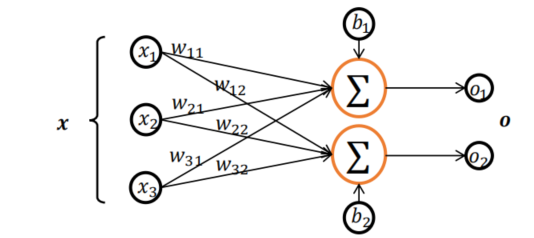

In [12]:
#考虑 2 个输出节点的网络层，我们创建长度为 2 的偏置向量𝒃，并累加在每个输出节点上：
# z=wx,模拟获得激活函数的输入 z 
z = tf.random.normal([4,2])
b = tf.zeros([2]) # 创建偏置向量
z = z + b # 累加上偏置向量   Broadcasting机制
z

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[-1.4285395 , -1.7673364 ],
       [ 1.7715343 , -0.30148467],
       [-1.0356761 ,  0.7725302 ],
       [ 0.5957057 ,  1.4931927 ]], dtype=float32)>

通过高层接口类 Dense()方式创建的网络层，张量𝑾和𝒃存储在类的内部，由类自动创   
建并管理。可以通过全连接层的 bias 成员变量查看偏置变量𝒃，例如创建输入节点数为 4，   
输出节点数为 3 的线性层网络，那么它的偏置向量 b 的长度应为 3，实现如下：

In [15]:
fc = tf.keras.layers.Dense(3) # 创建一层 Wx+b，输出节点为 3 # 通过 build 函数创建 W,b 张量，输入节点为 4
fc.build(input_shape=(2,4))
fc.bias # 查看偏置向量

<tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

可以看到，类的偏置成员 bias 为长度为 3 的向量，初始化为全 0，这也是偏置𝒃的默认初始   
化方案。同时偏置向量𝒃的类型为 Variable，这是因为𝑾和𝒃都是待优化参数。

矩阵

矩阵也是非常常见的张量类型，比如全连接层的批量输入张量𝑿的形状为[𝑏, 𝑑in]，其   
中𝑏表示输入样本的个数，即 Batch Size，𝑑in表示输入特征的长度。例如特征长度为 4，一   
共包含 2 个样本的输入可以表示为矩阵:    

In [16]:
x = tf.random.normal([2,4]) # 2 个样本，特征长度为 4 的张量
# 令全连接层的输出节点数为 3，则它的权值张量𝑾的 shape 为[4,3]，我们利用张量𝑿、𝑾和向量𝒃可以直接实现一个网络层:
w = tf.ones([4,3]) # 定义 W 张量
b = tf.zeros([3]) # 定义 b 张量
o = x@w+b # X@W+b
o

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1.2267847 , 1.2267847 , 1.2267847 ],
       [0.12478958, 0.12478958, 0.12478958]], dtype=float32)>

其中𝑿和𝑾张量均是矩阵，上述代码实现了一个线性变换的网络层，激活函数为空。一般<br>
地，𝜎(𝑿@𝑾 + 𝒃)网络层称为全连接层，在 TensorFlow 中可以通过 Dense 类直接实现，特<br>
别地，当激活函数𝜎为空时，全连接层也称为线性层。我们通过 Dense 类创建输入 4 个节<br>
点，输出 3 个节点的网络层，并通过全连接层的 kernel 成员名查看其权值矩阵𝑾：

In [17]:
fc = tf.keras.layers.Dense(3) # 定义全连接层的输出节点为 3
fc.build(input_shape=(2,4)) # 定义全连接层的输入节点为 4
fc.kernel # 查看权值矩阵 W

<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.07062852, -0.10925031, -0.32127208],
       [ 0.18461394, -0.8600219 ,  0.5953834 ],
       [-0.7936317 ,  0.7986438 , -0.8681581 ],
       [ 0.3973652 ,  0.0310021 , -0.7442116 ]], dtype=float32)>

三维张量

三维的张量一个典型应用是表示序列信号，它的格式是<br>
𝑿 = [𝑏, sequence len, feature len]<br>
其中𝑏表示序列信号的数量，sequence len 表示序列信号在时间维度上的采样点数或步数， feature len 表示每个点的特征长度。<br>
考虑自然语言处理(Natural Language Processing，简称 NLP)中句子的表示，如评价句<br>
子的是否为正面情绪的情感分类任务网络，如图 4.3 所示。为了能够方便字符串被神经网<br>
络处理，一般将单词通过嵌入层(Embedding Layer)编码为固定长度的向量，比如“a”编码<br>
为某个长度 3 的向量，那么 2 个等长(单词数量为 5)的句子序列可以表示为 shape 为[2,5,3] 的 3 维张量，其中 2 表示句子个数，5 表示单词数量，3 表示单词向量的长度。我们通过IMDB 数据集来演示如何表示句子，代码如下：

In [19]:
 # 自动加载 IMDB 电影评价数据集(只在内存中缓存)
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.imdb.load_data(num_words=1000)
# 将句子填充、截断为等长 80 个单词的句子
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,maxlen=80)
x_train.shape

17465344/17464789 [==============================] - 5s 0us/step


(25000, 80)

可以看到 x_train 张量的 shape 为[25000,80]，其中 25000 表示句子个数，80 表示每个句子    
共 80 个单词，每个单词使用数字编码方式表示。我们通过 layers.Embedding 层将数字编码      
的单词转换为长度为 100 个词向量：

In [21]:
# 创建词向量 Embedding 层类
embedding = tf.keras.layers.Embedding(1000, 100) # 将数字编码的单词转换为词向量
out = embedding(x_train)
out.shape

TensorShape([25000, 80, 100])

四维张量

这里只讨论三、四维张量，大于四维的张量一般应用的比较少，如在元学习(Meta Learning)中会采用五维的张量表示方法，理解方法与三、四维张量类似，不再赘述。 四维张量在卷积神经网络中应用非常广泛，它用于保存特征图(Feature maps)数据，格式一般定义为<br>
                                    $$[𝑏, ℎ, , 𝑐]$$
其中𝑏表示输入样本的数量，ℎ/ 分别表示特征图的高/宽，𝑐表示特征图的通道数，部分深度学习框架也会使用[𝑏, 𝑐, ℎ, ]格式的特征图张量，例如 PyTorch。图片数据是特征图的一种，对于含有 RGB 3 个通道的彩色图片，每张图片包含了ℎ行 列像素点，每个点需要 3个数值表示 RGB 通道的颜色强度，因此一张图片可以表示为[ℎ, , 3]。如图所示，最上层的图片表示原图，它包含了下面 3 个通道的强度信息。
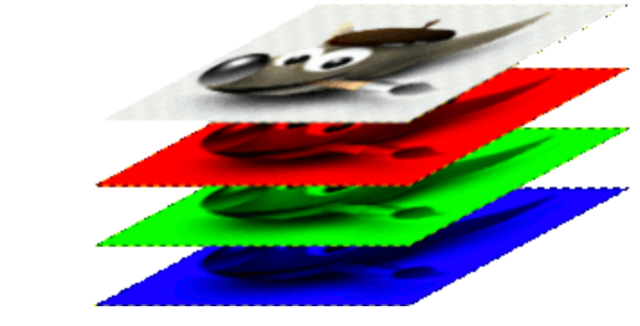

In [23]:
# 神经网络中一般并行计算多个输入以提高计算效率，故𝑏张图片的张量可表示为[𝑏, ℎ, , 3]，例如。
# 创建 32x32 的彩色图片输入，个数为 4 
x = tf.random.normal([4,32,32,3])
# 创建卷积神经网络
layer = tf.keras.layers.Conv2D(16,kernel_size=3)
out = layer(x) # 前向计算
out.shape # 输出大小

TensorShape([4, 30, 30, 16])

In [24]:
# 其中卷积核张量也是 4 维张量，可以通过 kernel 成员变量访问：
layer.kernel.shape # 访问卷积核张量

TensorShape([3, 3, 3, 16])

索引与切片

通过索引与切片操作可以提取张量的部分数据，它们的使用频率非常高。
索引

在 TensorFlow 中，支持基本的[𝑖][𝑗]⋯标准索引方式，也支持通过逗号分隔索引号的索   
引方式。考虑输入𝑿为 4 张32 × 32大小的彩色图片(为了方便演示，大部分张量都使用随机    
分布模拟产生，后文同)，shape 为[4,32,32,3]，首先创建张量：

In [3]:
x = tf.random.normal([4,32,32,3]) # 创建 4D 张量
# 接下来我们使用索引方式读取张量的部分数据，取第 1 张图片的数据：
x[0] # 程序中的第一的索引号应为 0，容易混淆，不过不影响理解

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[ 0.12609074,  0.30916753,  1.2951612 ],
        [ 2.0747588 , -0.58571684, -1.222761  ],
        [-1.5748391 ,  0.7160275 ,  0.7315052 ],
        ...,
        [ 0.25985613, -0.7981558 ,  0.45075217],
        [-1.7102966 , -1.5505866 ,  1.1336023 ],
        [ 1.3503122 , -0.5328784 ,  0.37598056]],

       [[-0.21684428,  1.5856987 ,  1.1883092 ],
        [ 0.4603385 ,  0.0226966 ,  0.47860292],
        [ 0.50480056, -0.28111047,  1.5547456 ],
        ...,
        [ 0.37683475, -0.04713834, -0.202881  ],
        [-0.01791912, -1.2953162 , -0.18098629],
        [ 0.5187887 ,  0.5618421 , -0.30552292]],

       [[ 1.4685075 ,  0.8270969 , -1.002321  ],
        [ 1.174179  ,  0.16521393, -1.1076198 ],
        [-0.93702483,  0.61646783, -1.5958067 ],
        ...,
        [-1.0021964 , -0.8200347 , -1.0810685 ],
        [ 0.35758483,  0.6025343 ,  1.2136588 ],
        [-0.05127801,  0.87981445,  1.1635001 ]],

       ...,

       

In [4]:
# 取第 3 张图片，第 2 行，第 1 列的像素，B 通道(第 2 个通道)颜色强度值，实现如下：
x[2,1,0,1]
# 当张量的维度数较高时，使用[𝑖][𝑗]. . .[𝑘]的方式书写不方便，可以采用[𝑖,𝑗, … , 𝑘]的方式索引，它们是等价的。

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9910527>

切片

通过start: end: step切片方式可以方便地提取一段数据，其中 start 为开始读取位置的索<br>
引，end 为结束读取位置的索引(不包含 end 位)，step 为采样步长。<br>
以 shape 为[4,32,32,3]的图片张量为例，我们解释如果切片获得不同位置的数据。例如<br>
读取第 2,3 张图片:   
x[1:3]

start: end: step切片方式有很多简写方式，其中 start、end、step 3 个参数可以根据需要     
选择性地省略，全部省略时即为::，表示从最开始读取到最末尾，步长为 1，即不跳过任何      
元素。如 x[0,::]表示读取第 1 张图片的所有行，其中::表示在行维度上读取所有行，它等价于x[0]的写法：

In [7]:
x[0,::] # 读取第一张图片,取掉，读取所有
# 为了更加简洁，::可以简写为单个冒号:，例如：

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[ 0.12609074,  0.30916753,  1.2951612 ],
        [ 2.0747588 , -0.58571684, -1.222761  ],
        [-1.5748391 ,  0.7160275 ,  0.7315052 ],
        ...,
        [ 0.25985613, -0.7981558 ,  0.45075217],
        [-1.7102966 , -1.5505866 ,  1.1336023 ],
        [ 1.3503122 , -0.5328784 ,  0.37598056]],

       [[-0.21684428,  1.5856987 ,  1.1883092 ],
        [ 0.4603385 ,  0.0226966 ,  0.47860292],
        [ 0.50480056, -0.28111047,  1.5547456 ],
        ...,
        [ 0.37683475, -0.04713834, -0.202881  ],
        [-0.01791912, -1.2953162 , -0.18098629],
        [ 0.5187887 ,  0.5618421 , -0.30552292]],

       [[ 1.4685075 ,  0.8270969 , -1.002321  ],
        [ 1.174179  ,  0.16521393, -1.1076198 ],
        [-0.93702483,  0.61646783, -1.5958067 ],
        ...,
        [-1.0021964 , -0.8200347 , -1.0810685 ],
        [ 0.35758483,  0.6025343 ,  1.2136588 ],
        [-0.05127801,  0.87981445,  1.1635001 ]],

       ...,

       

In [ ]:
#为了更加简洁，::可以简写为单个冒号:，例如：
x[:,0:28:2,0:28:2,:] #28/2=14 <tf.Tensor: shape=(4, 14, 14, 3), dtype=float32

表示读取所有图片、隔行采样、隔列采样，、读取所有通道数据，相当于在图片的高宽上各缩放至原来的50%。
我们来总结一下start: end: step切片的简写方式，其中从第一个元素读取时 start 可以省<br>
略，即 start=0 是可以省略，取到最后一个元素时 end 可以省略，步长为 1 时 step 可以省<br>
略，简写方式总结如表：
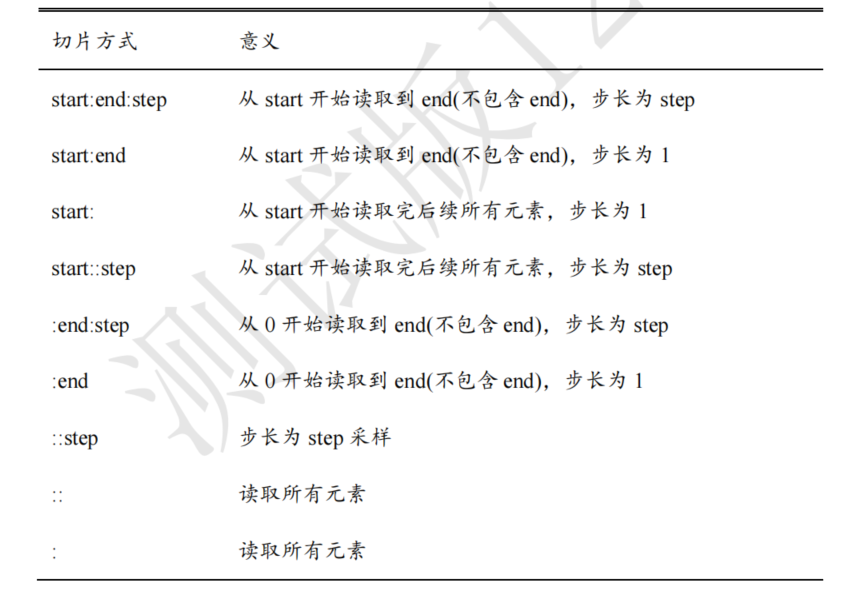

特别地，step 可以为负数，考虑最特殊的一种例子，当step = −1时，start: end: −1表示从 start 开始，逆序读取至 end 结束(不包含 end)，索引号𝑒𝑛𝑑 ≤ 𝑠𝑡𝑎𝑟𝑡。考虑一个 0~9 的简单序列向量，逆序取到第 1 号元素，不包含第 1 号：

In [9]:
x = tf.range(9) # 创建 0~9 向量
x[8:0:-1] # 从 8 取到 0，逆序，不包含 0 (左闭右开)
x[::-1] # 逆序全部元素

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([8, 7, 6, 5, 4, 3, 2, 1, 0])>

张量的维度数量较多时，不需要采样的维度一般用单冒号:表示采样所有元素，此时     
有可能出现大量的:出现。继续考虑[4,32,32,3]的图片张量，当需要读取 G 通道上的数据   
时，前面所有维度全部提取，此时需要写为：   
x[:,:,:,1]取G通道数据

为了避免出现像 [: , : , : ,1]这样过多冒号的情况，可以使用⋯符号表示取多个维度上所   
有的数据，其中维度的数量需根据规则自动推断：当切片方式出现⋯符号时，⋯符号左边    
的维度将自动对齐到最左边，⋯符号右边的维度将自动对齐到最右边，此时系统再自动推   
断⋯符号代表的维度数量，它的切片方式总结如表所示：
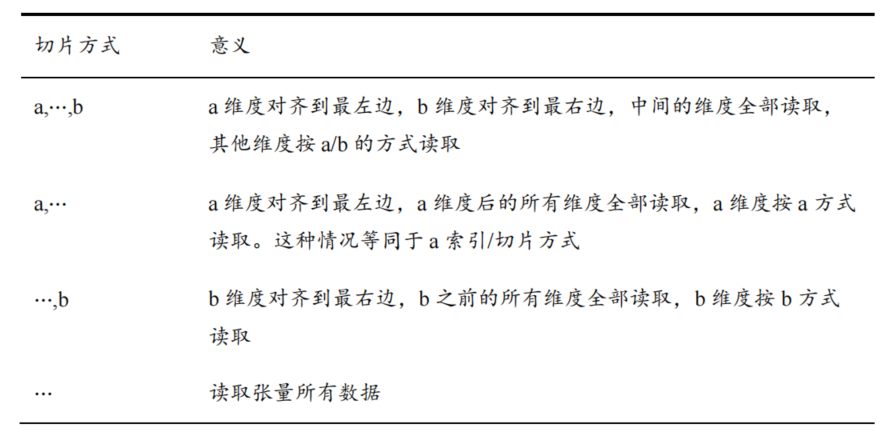

读取第 1~2 张图片的 G/B 通道数据，实现如下：   

x[0:2,...,1:] # 高宽维度全部采集   
<tf.Tensor: id=497, shape=(2, 32, 32, 2)   

读取 R/G 通道数据，代码如下：   
x[...,:2] # 所有样本，所有高、宽的前 2 个通道     
<tf.Tensor: id=507, shape=(4, 32, 32, 2)     

维度变换

在神经网络运算过程中，维度变换是最核心的张量操作，通过维度变换可以将数据任意地切换形式，满足不同场合的运算需求。算法的每个模块对于数据张量的格式有不同的逻辑要求，当现有的数据格式不满足算法要求时，需要通过维度变换将数据调整为正确的格式。这就是维度变换的功能。基本的维度变换操作函数包含了改变视图 reshape、插入新维度 expand_dims，删除维度 squeeze、交换维度 transpose、复制数据 tile 等函数。

改变视图

在介绍改变视图 reshape 操作之前，我们先来认识一下张量的存储(Storage)和视图 (View)的概念。张量的视图就是我们理解张量的方式，比如 shape 为[2,4,4,3]的张量𝑨，我们从逻辑上可以理解为 2 张图片，每张图片 4 行 4 列，每个位置有 RGB 3 个通道的数据；张量的存储体现在张量在内存上保存为一段连续的内存区域，对于同样的存储，我们可以有不同的理解方式，比如上述张量𝑨，我们可以在不改变张量的存储下，将张量𝑨理解为 2个样本，每个样本的特征为长度 48 的向量。同一个存储，从不同的角度观察数据，可以产生不同的视图，这就是存储与视图的关系。视图的产生是非常灵活的，但需要保证是合理。

我们通过 tf.range()模拟生成一个向量数据，并通过 tf.reshape 视图改变函数产生不同的视图，例如：

In [5]:
x = tf.range(96) #生成向量
x = tf.reshape(x,[2,4,4,3]) # 改变 x 的视图，获得 4D 张量，存储并未改变
# 可以观察到数据仍然是 0~95 的顺序，可见数据并未改变，改变的是数据的结构

在存储数据时，内存并不支持这个维度层级概念，只能以平铺方式按序写入内存，因此这<br>
种层级关系需要人为管理，也就是说，每个张量的存储顺序需要人为跟踪。为了方便表<br>
达，我们把张量 shape 列表中相对靠左侧的维度叫作大维度，shape 列表中相对靠右侧的维<br>
度叫作小维度，比如[2,4,4,3]的张量中，图片数量维度与通道数量相比，图片数量叫作大维<br>
度，通道数叫作小维度。在优先写入小维度的设定下，上述张量的内存布局为
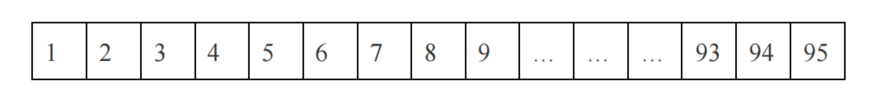
由于存储时数据只有平坦结构，与数据的逻辑结构是分离的，因此如果新的逻辑结构不需要改变数据的存储方式，就可以节省大量计算资源，这也是改变视图操作的优势。改变视图操作在提供便捷性的同时，也会带来很多逻辑隐患，这主要的原因是改变视图操作的默认前提是存储不需要改变，否则改变视图操作就是非法的。我们先介绍合法的视图变换操作，再介绍不合法的视图变换。例如，张量𝑨按着初始视图[𝑏, ℎ, , 𝑐]写入的内存布局，我们改变𝑨的理解方式，它可以有如下多种合法的理解方式：    
❑ [𝑏, ℎ ∙ , 𝑐] 张量理解为𝑏张图片，ℎ ∙ 个像素点，𝑐个通道<br>
❑ [𝑏, ℎ, ∙ 𝑐] 张量理解为𝑏张图片，ℎ行，每行的特征长度为w ∙ 𝑐<br>
❑ [𝑏, ℎ ∙ ∙ 𝑐] 张量理解为𝑏张图片，每张图片的特征长度为ℎ ∙ w ∙ 𝑐<br>
上述新视图的存储都不需要改变，因此是合法的。    
如果新视图为[𝑏, w, ℎ, 𝑐]，[𝑏, 𝑐, ℎ ∗ w]或者[𝑏, 𝑐, ℎ, w]等时，张量的存储顺序需要改变，如果不同步更新张量的存储顺序，那么恢复出的数据将与新视图不一致

改变视图是神经网络中非常常见的操作，可以通过串联多个 reshape 操作来实现复杂逻辑，但是在通过 reshape 改变视图时，必须始终记住张量的存储顺序，新视图的维度顺序不能与存储顺序相悖，否则需要通过交换维度操作将存储顺序同步过来。举个例子，对于 shape 为[4,32,32,3]的图片数据，通过 reshape 操作将 shape 调整为[4,1024,3]，此时视图的维度顺序为𝑏 − pixel − 𝑐，张量的存储顺序为[𝑏, ℎ, w, 𝑐]。可以将[4,1024,3]恢复为

❑ [𝑏, ℎ, w, 𝑐] = [4,32,32,3]时，新视图的维度顺序与存储顺序无冲突，可以恢复出无逻辑问题的数据。    
❑ [𝑏, , ℎ, 𝑐] = [4,32,32,3]时，新视图的维度顺序与存储顺序冲突。   
❑ [ℎ ∙ w ∙ 𝑐, 𝑏] = [3072,4]时，新视图的维度顺序与存储顺序冲突。    
在TensorFlow 中，可以通过张量的 ndim 和 shape 成员属性获得张量的维度数和形状：

In [6]:
x.ndim,x.shape # 获取张量的维度数和形状列表

(4, TensorShape([2, 4, 4, 3]))

In [7]:
# 通过 tf.reshape(x, new_shape)，可以将张量的视图任意地合法改变，例如：
tf.reshape(x,[2,-1])

<tf.Tensor: shape=(2, 48), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]])>

其中的参数−1表示当前轴上长度需要根据张量总元素不变的法则自动推导，从而方便用户     
书写。比如，上面的−1可以推导为2 ∙ 4 ∙ 4 ∙ 3 / 2 = 48    
再次改变数据的视图为[2,4,12]，实现如下：   
tf.reshape(x,[2,4,12])    
通过上述的一系列连续变换视图操作时需要意识到，张量的存储顺序始终没有改变，数据在内存中仍然是按着初始写入的顺序0,1,2, ⋯ ,95保存的。

增、删维度

增加维度 增加一个长度为 1 的维度相当于给原有的数据添加一个新维度的概念，维度长度为 1，故数据并不需要改变，仅仅是改变数据的理解方式，因此它其实可以理解为改变视图的一种特殊方式。考虑一个具体例子，一张28 × 28大小的灰度图片的数据保存为 shape 为[28,28]的张量，在末尾给张量增加一新维度，定义为通道数维度，此时张量的 shape 变为[28,28,1]，实现如下：

In [17]:
# 产生矩阵
x = tf.random.uniform([28,28],maxval=10,dtype=tf.int32)
# 通过 tf.expand_dims(x, axis)可在指定的 axis 轴前可以插入一个新的维度：
x = tf.expand_dims(x,axis=2) # axis=2 表示宽维度后面的一个维度
# Out[]:tf.Tensor: shape=(28, 28, 1), dtype=int32

可以看到，插入一个新维度后，数据的存储顺序并没有改变，依然按着6,2,0,0,6,7,⋯的顺序保存，仅仅是在插入一个新的维度后，改变了数据的视图。
同样的方法，我们可以在最前面插入一个新的维度，并命名为图片数量维度，长度为1，此时张量的 shape 变为[1,28,28,1]

In [20]:
x = tf.expand_dims(x,axis=0) # 高维度之前插入新维度
# Out[]: <tf.Tensor: id=15, shape=(1, 28, 28, 1), dtype=int32>

需要注意的是，tf.expand_dims 的 axis 为正时，表示在当前维度之前插入一个新维度；为负时，表示当前维度之后插入一个新的维度。
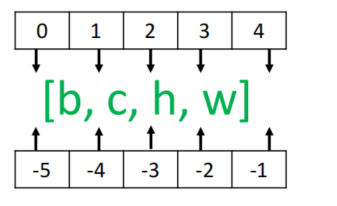

删除维度 是增加维度的逆操作，与增加维度一样，删除维度只能删除长度为 1 的维度，也不会改变张量的存储。继续考虑增加维度后 shape 为[1,28,28,1]的例子，如果希望将图片数量维度删除，可以通过 tf.squeeze(x, axis)函数，axis 参数为待删除的维度的索引号，例如，图片数量的维度轴 axis=0：

In [21]:
x = tf.squeeze(x, axis=0) # 删除图片数量维度
# Out[75]:<tf.Tensor: id=586, shape=(28, 28, 1), dtype=int32>
# 如果不指定维度参数 axis，即 tf.squeeze(x)，那么它会默认删除所有长度为 1 的维度

交换维度

改变视图、增删维度都不会影响张量的存储。在实现算法逻辑时，在保持维度顺序不
变的条件下，仅仅改变张量的理解方式是不够的，有时需要直接调整的存储顺序，即交换
维度(Transpose)。通过交换维度操作，改变了张量的存储顺序，同时也改变了张量的视
图。
交换维度操作是非常常见的，比如在 TensorFlow 中，图片张量的默认存储格式是通道
后行格式：[𝑏, ℎ, w, 𝑐]，但是部分库的图片格式是通道先行格式：[𝑏, 𝑐, ℎ, w]，因此需要完成
[𝑏, ℎ, w, 𝑐]到[𝑏, 𝑐, ℎ, w]维度交换运算，此时若简单的使用改变视图函数 reshape，则新视图
的存储方式需要改变，因此使用改变视图函数是不合法的。我们以[𝑏, ℎ, w, 𝑐]转换到
[𝑏, 𝑐, ℎ, w]为例，介绍如何使用 tf.transpose(x, perm)函数完成维度交换操作，其中参数 perm
表示新维度的顺序 List。考虑图片张量 shape 为[2,32,32,3]，“图片数量、行、列、通道
数”的维度索引分别为 0、1、2、3，如果需要交换为[𝑏, 𝑐, ℎ, w]格式，则新维度的排序为
“图片数量、通道数、行、列”，对应的索引号为[0,3,1,2]，因此参数 perm 需设置为

In [24]:
x = tf.random.normal([2,32,32,3])
x = tf.transpose(x,perm=[0,3,1,2]) # 交换维度
# Out[78]:<tf.Tensor: shape=(2, 3, 32, 32), dtype=float32>

需要注意的是，通过 tf.transpose 完成维度交换后，张量的存储顺序已经改变，视图也
随之改变，后续的所有操作必须基于新的存续顺序和视图进行。相对于改变视图操作，维
度交换操作的计算代价更高。

复制数据

当通过增加维度操作插入新维度后，可能希望在新的维度上面复制若干份数据，满足
后续算法的格式要求。考虑𝒀 = 𝑿@𝑾 + 𝒃的例子，偏置𝒃插入样本数的新维度后，需要在
新维度上复制 Batch Size 份数据，将 shape 变为与𝑿@𝑾一致后，才能完成张量相加运算。
可以通过 tf.tile(x, multiples)函数完成数据在指定维度上的复制操作，multiples 分别指
定了每个维度上面的复制倍数，对应位置为 1 表明不复制，为 2 表明新长度为原来长度的
2 倍，即数据复制一份，以此类推。

In [26]:
b = tf.constant([1,2]) # 创建向量 b
b = tf.expand_dims(b, axis=0) # 插入新维度，变成矩阵
b

<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[1, 2]])>

通过 tf.tile(b, multiples=[2,1])即可在 axis=0 维度复制 1 次，在 axis=1 维度不复制：

In [28]:
# 在 Batch 维度上复制数据 1 份，实现如下：
# 通过 tf.tile(b, multiples=[2,1])即可在 axis=0 （行）维度复制 1 次，在 axis=1 （列）维度不复制：
tf.tile(b, multiples=[2,1]) 

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [1, 2]])>

实际上，上述插入维度和复制数据的步骤并不需要我们手动执行，TensorFlow 会自动完成，这就是自动扩展功能（广播机制）。

Broadcasting

Broadcasting 称为广播机制(或自动扩展机制)，它是一种轻量级的张量复制手段，在逻
辑上扩展张量数据的形状，但是只会在需要时才会执行实际存储复制操作。对于大部分场
景，Broadcasting 机制都能通过优化手段避免实际复制数据而完成逻辑运算，从而相对于
tf.tile 函数，减少了大量计算代价。
对于所有长度为 1 的维度，Broadcasting 的效果和 tf.tile 一样，都能在此维度上逻辑复
制数据若干份，区别在于 tf.tile 会创建一个新的张量，执行复制 IO 操作，并保存复制后的
张量数据，而 Broadcasting 并不会立即复制数据，它会在逻辑上改变张量的形状，使得视
图上变成了复制后的形状。Broadcasting 会通过深度学习框架的优化手段避免实际复制数据
而完成逻辑运算，至于怎么实现的用户不必关心，对于用户来说，Broadcasting 和 tf.tile 复
制的最终效果是一样的，操作对用户透明，但是 Broadcasting 机制节省了大量计算资源，
建议在运算过程中尽可能地利用 Broadcasting 机制提高计算效率。

In [30]:
# 通过 tf.broadcast_to(x, new_shape)函数可以显式地执行自动扩展功能，将现有shape扩张为new_shape，实现如下：
A = tf.random.normal([32,1]) # 创建矩阵
A = tf.broadcast_to(A, [2,32,32,3]) # 扩展为 4D 张量 (每列完全一样)

我们来考虑不满足普适性原则的例子，如下图所示。
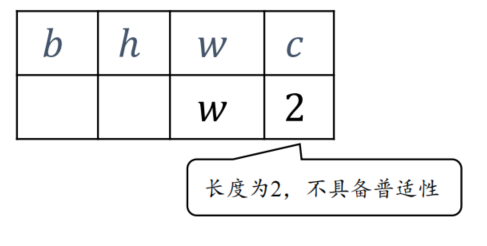
在𝑐维度上，张量已经有 2 个特征数据，新 shape 对应维度的长度为𝑐(𝑐 ≠ 2，如𝑐=3)，那么
当前维度上的这 2 个特征无法普适到其它位置，故不满足普适性原则，无法应用
Broadcasting 机制，将会触发错误，例如：

In [31]:
A = tf.random.normal([32,2]) 
tf.broadcast_to(A, [2,32,32,4]) # 不符合 Broadcasting 条件

InvalidArgumentError: Incompatible shapes: [32,2] vs. [2,32,32,4] [Op:BroadcastTo]

在进行张量运算时，有些运算在处理不同 shape 的张量时，会隐式地自动调用
Broadcasting 机制，如+，-，*，/等运算等，将参与运算的张量 Broadcasting 成一个公共
shape，再进行相应的计算。如图所示，演示了 3 种不同 shape 下的张量𝑨、𝑩相加的例子：
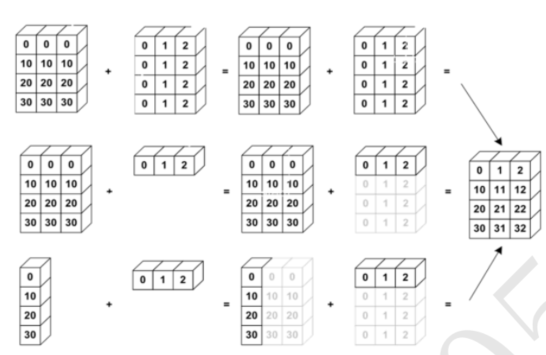

In [33]:
a = tf.random.normal([2,32,32,1])
b = tf.random.normal([32,32])
# a+b,a-b,a*b,a/b测试加减乘除运算的 Broadcasting 机制

数学运算

前面的章节已经使用了基本的加、减、乘、除等基本数学运算函数，本节我们将系统
地介绍 TensorFlow 中常见的数学运算函数。

加、减、乘、除运算

加、减、乘、除是最基本的数学运算，分别通过 tf.add, tf.subtract, tf.multiply, tf.divide(内部)
函数实现，TensorFlow 已经重载了+、 − 、 ∗ 、/运算符，一般推荐直接使用运算符来完成
加、减、乘、除运算。
整除和余除也是常见的运算之一，分别通过//和%运算符实现。我们来演示整除运
算，例如：

In [34]:
a = tf.range(5)
b = tf.constant(2)
a//b # 整除运算

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 1, 1, 2])>

乘方运算

通过 tf.pow(x, a)可以方便地完成𝑦 = 𝑎的乘方运算，也可以通过运算符** 实现 ∗∗ 𝑎运算

设置指数为1/𝑎形式，即可实现𝑎根号运算，常见的平方根可以tf.sqrt(x)

指数和对数运算

通过 tf.pow(a, x)或者**运算符也可以方便地实现指数运算𝑎𝑥

特别地，对于自然指数e𝑥，可以通过 tf.exp(x)实现，例如：

In [35]:
 tf.exp(1.) # 自然指数运算

<tf.Tensor: shape=(), dtype=float32, numpy=2.7182817>

在 TensorFlow 中，自然对数$log_{e}x$ 可以通过 tf.math.log(x)实现，例如:

In [37]:
tf.math.log(tf.exp(3.)) # 对数运算

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

如果希望计算其它底数的对数，可以根据对数的换底公式：
$$log_{a}x=\frac{log_{e}x}{log_{e}a}$$
tf.math.log(x)/tf.math.log(a.) 

矩阵相乘运算

神经网络中间包含了大量的矩阵相乘运算，前面我们已经介绍了通过@运算符可以方
便的实现矩阵相乘，还可以通过 tf.matmul(a, b)函数实现。需要注意的是，TensorFlow 中的
矩阵相乘可以使用批量方式，也就是张量𝑨和𝑩的维度数可以大于 2。当张量𝑨和𝑩维度数大
于 2 时，TensorFlow 会选择𝑨和𝑩的最后两个维度进行矩阵相乘，前面所有的维度都视作
Batch 维度。

根据矩阵相乘的定义，𝑨和𝑩能够矩阵相乘的条件是，𝑨的倒数第一个维度长度(列)和𝑩
的倒数第二个维度长度(行)必须相等。比如张量 a shape:[4,3,28,32]可以与张量 b
shape:[4,3,32,2]进行矩阵相乘，代码如下：

In [39]:
a = tf.random.normal([4,3,28,32])
b = tf.random.normal([4,3,32,2])
a@b # 批量形式的矩阵相乘
#Out[100]:<tf.Tensor: id=236, shape=(4, 3, 28, 2), dtype=float32>

In [41]:
# 矩阵相乘函数同样支持自动 Broadcasting 机制，例如:
a = tf.random.normal([4,28,32])
b = tf.random.normal([32,16])
tf.matmul(a,b) # 先自动扩展，再矩阵相乘
#Out[100]:<tf.Tensor: id=236, shape=(4, 28, 16), dtype=float32>